In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# %pip install sdv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 3.8 MB/s 
     |████████████████████████████████| 131 kB 30.0 MB/s 
     |████████████████████████████████| 61 kB 377 kB/s 
     |████████████████████████████████| 47 kB 3.3 MB/s 
     |████████████████████████████████| 1.6 MB 55.5 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |████████████████████████████████| 9.4 MB 42.9 MB/s 
     |████████████████████████████████| 295 kB 55.5 MB/s 
     |████████████████████████████████| 965 kB 52.3 MB/s 
     |████████████████████████████████| 280 kB 57.4 MB/s 
     |████████████████████████████████| 662 kB 49.9 MB/s 
     |████████████████████████████████| 15.3 MB 49.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: psutil
    Found existing installation: p

In [4]:
import pandas as pd
import numpy as np
from sdv import Metadata
from sdv.relational import HMA1

# Data Preprocessing

In [15]:
df = pd.read_csv("/content/drive/Shareddrives/SI670 Final_Proj/transactions.csv")

In [16]:
df.head()

,OBJECTID,AGENCY,TRANSACTION_DATE,TRANSACTION_AMOUNT,VENDOR_NAME,VENDOR_STATE_PROVINCE,MCC_DESCRIPTION
0,481,Department of Youth Rehabilitation Services,2009-01-06T00:00:00.000Z,977.00,MY SAFE FOOD HANDLER,MD,Business Services Not Elsewhere Classified
1,482,Department of Youth Rehabilitation Services,2009-01-06T00:00:00.000Z,-25.61,AMES SAFETY ENVELOPE C,MA,Miscellaneous Publishing And Printing
2,483,DC Public Library,2009-01-07T00:00:00.000Z,1035.29,WWW.AIA.ORG,DC,"Membership Organizations, Not Elsewhere Classi..."
3,484,Office of the State Superintendent of Education,2009-01-06T00:00:00.000Z,222.40,DELTA 00675274330522,TN,Delta
4,485,Office of the State Superintendent of Education,2009-01-06T00:00:00.000Z,222.40,DELTA 00675274330500,TN,Delta


In [17]:
df['Date'] = df['TRANSACTION_DATE'].apply(lambda x: x.split('T')[0])

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275127 entries, 0 to 275126
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   OBJECTID               275127 non-null  int64         
 1   AGENCY                 275127 non-null  object        
 2   TRANSACTION_DATE       275127 non-null  object        
 3   TRANSACTION_AMOUNT     275127 non-null  float64       
 4   VENDOR_NAME            275088 non-null  object        
 5   VENDOR_STATE_PROVINCE  274898 non-null  object        
 6   MCC_DESCRIPTION        275109 non-null  object        
 7   Date                   275127 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 16.8+ MB


In [20]:
df_2009 = df[df['Date'].dt.year==2009].drop(['OBJECTID',
                                            'TRANSACTION_DATE',
                                            'VENDOR_NAME',
                                            'MCC_DESCRIPTION'], axis=1)
df_2009.head()

,AGENCY,TRANSACTION_AMOUNT,VENDOR_STATE_PROVINCE,Date
0,Department of Youth Rehabilitation Services,977.00,MD,2009-01-06
1,Department of Youth Rehabilitation Services,-25.61,MA,2009-01-06
2,DC Public Library,1035.29,DC,2009-01-07
3,Office of the State Superintendent of Education,222.40,TN,2009-01-06
4,Office of the State Superintendent of Education,222.40,TN,2009-01-06


In [21]:
df_2009['Date'].nunique()

363

In [22]:
df_2009.isnull().sum()

AGENCY                    0
TRANSACTION_AMOUNT        0
VENDOR_STATE_PROVINCE    52
Date                      0
dtype: int64

In [23]:
# df_2009.dropna(inplace=True)

In [24]:
# df_2009.isnull().sum()

In [25]:
df_2009.groupby('Date').sum()[['TRANSACTION_AMOUNT']].reset_index().sort_values(by='TRANSACTION_AMOUNT', ascending=False)

,Date,TRANSACTION_AMOUNT
265,2009-09-25,224114.01
264,2009-09-24,169880.52
269,2009-09-29,154503.23
257,2009-09-17,145221.81
263,2009-09-23,140208.70
...,...,...
141,2009-05-24,213.60
162,2009-06-14,154.12
155,2009-06-07,135.50
211,2009-08-02,125.81


In [26]:
df_2009.groupby('AGENCY').sum()[['TRANSACTION_AMOUNT']].reset_index().sort_values(by='TRANSACTION_AMOUNT', ascending=False)

,AGENCY,TRANSACTION_AMOUNT
38,Fire & Emergency Medical Services,1883418.31
22,Department of Health,1137740.32
42,Metropolitan Police Department,923758.99
36,District Department of Transportation,923430.17
37,District Department of the Environment,713257.34
...,...,...
41,Medical Liability Captive Insurance Agency,9262.88
59,Office of Veterans Affairs,8017.61
40,Judicial Nomination Commission,4961.66
48,Office of Employee Appeals,4379.87


In [27]:
import plotly.express as px


px.choropleth(df_2009.groupby('VENDOR_STATE_PROVINCE').sum()[['TRANSACTION_AMOUNT']].reset_index(), 
              locations='VENDOR_STATE_PROVINCE',
              color="TRANSACTION_AMOUNT",
              color_continuous_scale="Blues",
              locationmode="USA-states",
              scope="usa",
              title='Transaction amount by State',
              height=750)

In [28]:
# df_2009['year'] = df_2009['Date'].dt.year
# df_2009['month'] = df_2009['Date'].dt.month
# df_2009['day'] = df_2009['Date'].dt.day

In [29]:
# def encode_cyclicality(data, col, max_val):
#   data[col+'_sin'] = np.sin(2*np.pi*data[col]/max_val)
#   data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
#   return data

In [30]:
# df_2009 = encode_cyclicality(df_2009, 'month', 12)
# df_2009 = encode_cyclicality(df_2009, 'day', 31)

## Parent Table

In [31]:
# agency = df_2009[['AGENCY', 'VENDOR_STATE_PROVINCE']].drop_duplicates()
# agency = agency.reset_index()
# agency.rename(columns={'index': 'agency_id'}, inplace=True)
# agency.head()

agency = df_2009[['AGENCY']].drop_duplicates()
agency = agency.reset_index()
agency.rename(columns={'index': 'agency_id'}, inplace=True)
agency.head()

,agency_id,AGENCY
0,0,Department of Youth Rehabilitation Services
1,2,DC Public Library
2,3,Office of the State Superintendent of Education
3,6,Alcoholic Beverage Regulation Administration
4,7,Fire & Emergency Medical Services


## Child Table

In [35]:
merged_df = df_2009.merge(agency, how='left', on=['AGENCY'])
merged_df.head()

,AGENCY,TRANSACTION_AMOUNT,VENDOR_STATE_PROVINCE,Date,agency_id
0,Department of Youth Rehabilitation Services,977.00,MD,2009-01-06,0
1,Department of Youth Rehabilitation Services,-25.61,MA,2009-01-06,0
2,DC Public Library,1035.29,DC,2009-01-07,2
3,Office of the State Superintendent of Education,222.40,TN,2009-01-06,3
4,Office of the State Superintendent of Education,222.40,TN,2009-01-06,3


In [36]:
merged_df['agency_id'].isnull().sum()

0

In [37]:
trans = merged_df.drop(['AGENCY', 'VENDOR_STATE_PROVINCE'], axis=1).reset_index()
trans = trans.rename(columns={'index': 'trans_id'})
trans.head()

,trans_id,TRANSACTION_AMOUNT,Date,agency_id
0,0,977.00,2009-01-06,0
1,1,-25.61,2009-01-06,0
2,2,1035.29,2009-01-07,2
3,3,222.40,2009-01-06,3
4,4,222.40,2009-01-06,3


# HMA1 Model

In [38]:
tables = {'agency': agency, 'transactions': trans}

In [39]:
# from sdv.constraints import FixedCombinations

# constraint = FixedCombinations(column_names=['AGENCY', 'VENDOR_STATE_PROVINCE'])

In [40]:
metadata = Metadata()
metadata.add_table(
    name='agency',
    data=tables['agency'],
    primary_key='agency_id',
    # constraints=[constraint]
)

In [41]:
metadata.add_table(
    name='transactions',
    data=tables['transactions'],
    primary_key='trans_id',
    parent='agency',
    foreign_key='agency_id'
)

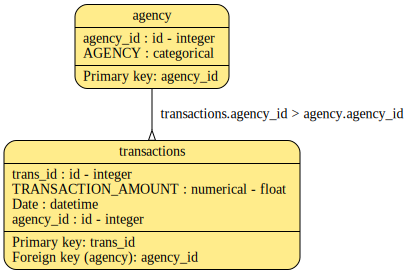

In [42]:
metadata.visualize()

In [43]:
model = HMA1(metadata)
model.fit(tables)

In [44]:
syn_data = model.sample()

/usr/local/lib/python3.8/dist-packages/sdv/relational/hma.py:371: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/sdv/relational/hma.py:400: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
syn_agency = syn_data['agency']
syn_agency.head()

,agency_id,AGENCY
0,0,Office of Justice Grants Administration
1,1,DC Department of Human Resources
2,2,Office of Disability Rights
3,3,Office of Administrative Hearings
4,4,DC Sentencing & Criminal Code Review Committee


In [46]:
syn_trans = syn_data['transactions']
syn_trans

,trans_id,TRANSACTION_AMOUNT,Date,agency_id
0,0,54.22,2009-10-18,0
1,1,-12.95,2009-07-14,0
2,2,620.62,2009-05-13,0
3,3,753.11,2009-06-17,0
4,4,228.89,2009-07-25,0
...,...,...,...,...
35448,35448,94.14,2009-08-25,74
35449,35449,130.40,2008-12-30,74
35450,35450,1738.80,2009-06-29,74
35451,35451,128.63,2009-10-31,74


In [60]:
hma_syn_data = syn_agency.merge(syn_trans, how='left', on='agency_id').drop(['agency_id', 'trans_id'], axis=1)

In [61]:
hma_syn_data.to_csv('hma_syn_data.csv', index=False)

# Evaluation

In [47]:
from sdmetrics.reports.multi_table import QualityReport
metadata_dict = metadata.to_dict()
report = QualityReport()
report.generate(tables, syn_data, metadata_dict)

Creating report: 100%|██████████| 5/5 [00:00<00:00, 51.68it/s]



Overall Quality Score: 79.09%

Properties:
Column Shapes: 72.88%
Column Pair Trends: 89.74%
Parent Child Relationships: 74.67%


In [48]:
report.get_score()

0.7909375368041905

In [49]:
report.get_details(property_name='Column Shapes')

,Table,Column,Metric,Quality Score
0,agency,AGENCY,TVComplement,0.586667
1,transactions,TRANSACTION_AMOUNT,KSComplement,0.816305
2,transactions,Date,KSComplement,0.925453


# ML efficacy

In [50]:
# %pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import kmodes.kprototypes as kk
import copy
import matplotlib.pyplot as plt

In [52]:
df_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28235 entries, 0 to 42999
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AGENCY                 28235 non-null  object        
 1   TRANSACTION_AMOUNT     28235 non-null  float64       
 2   VENDOR_STATE_PROVINCE  28183 non-null  object        
 3   Date                   28235 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.1+ MB


In [53]:
real_data = copy.deepcopy(df_2009)

In [54]:
real_data['Date'] = real_data['Date'].apply(lambda x: x.timestamp())

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
amount = scaler.fit_transform(real_data.values[:, 1].reshape(-1, 1))
date = scaler.fit_transform(real_data.values[:, 3].reshape(-1, 1))

In [56]:
real_data['TRANSACTION_AMOUNT'] = amount
real_data['Date'] = date

In [57]:
real_data.head()

,AGENCY,TRANSACTION_AMOUNT,VENDOR_STATE_PROVINCE,Date
0,Department of Youth Rehabilitation Services,0.500361,MD,-1.757301
1,Department of Youth Rehabilitation Services,-0.683847,MA,-1.757301
2,DC Public Library,0.569209,DC,-1.747434
3,Office of the State Superintendent of Education,-0.390916,TN,-1.757301
4,Office of the State Superintendent of Education,-0.390916,TN,-1.757301


In [ ]:
scores = []
for k in range(1, 6):
    kproto = kk.KPrototypes(n_clusters=k, verbose=0, max_iter=20)
    kproto.fit_predict(real_data.values, categorical=[0, 2])
    scores.append(kproto.cost_)

Best value for k:


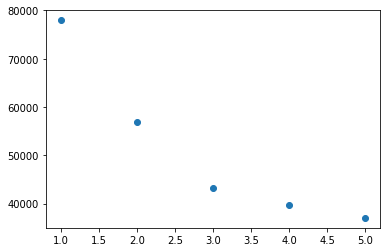

In [ ]:
plt.scatter(list(range(1, 6)), scores)
print('Best value for k:')

In [ ]:
synthetic = syn_data['transactions'].merge(syn_data['agency'], how='left', on='agency_id').drop(['trans_id', 'agency_id'], axis=1)
synthetic.head()

,TRANSACTION_AMOUNT,Date,AGENCY,VENDOR_STATE_PROVINCE
0,-300.48,2008-09-19,Department of Health,NV
1,-804.84,2009-03-24,Department of Health,NV
2,-569.45,2009-05-27,Department of Health,NV
3,-330.03,2009-03-13,Department of Health,NV
4,-206.53,2009-05-11,Department of Health,NV


In [ ]:
synthetic['Date'] = synthetic['Date'].apply(lambda x: x.timestamp())

In [ ]:
scaler = StandardScaler()
amount = scaler.fit_transform(synthetic.values[:, 0].reshape(-1, 1))
date = scaler.fit_transform(synthetic.values[:, 1].reshape(-1, 1))

In [ ]:
synthetic['TRANSACTION_AMOUNT'] = amount
synthetic['Date'] = date

In [ ]:
syn_clustering_scores = []
for k in range(1, 6):
    kproto = kk.KPrototypes(n_clusters=k, verbose=0, max_iter=20)
    kproto.fit_predict(synthetic.values, categorical=[2, 3])
    syn_clustering_scores.append(kproto.cost_)

Best value for k:


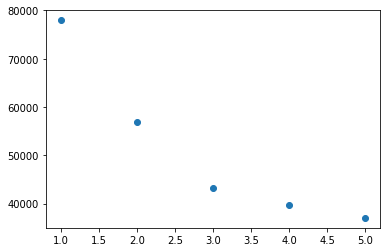

In [ ]:
plt.scatter(list(range(1, 6)), scores)
print('Best value for k:')